# Trabajo de Grupo - KNN


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [0]:
#cargamos datos txt o csv
#df0 = pd.read_csv('dataset.txt')
df0 = pd.read_csv('dataset.csv')

names = df0.iloc[0]
print(names)
# eliminamos la segunda fila de nombres porque ya existe una cabecera ID, X1, X2, ... Y
df0 = df0.drop(0)

ID            ID
X1     LIMIT_BAL
X2           SEX
X3     EDUCATION
X4      MARRIAGE
X5           AGE
X6         PAY_0
X7         PAY_2
X8         PAY_3
X9         PAY_4
X10        PAY_5
X11        PAY_6
X12    BILL_AMT1
X13    BILL_AMT2
X14    BILL_AMT3
X15    BILL_AMT4
X16    BILL_AMT5
X17    BILL_AMT6
X18     PAY_AMT1
X19     PAY_AMT2
X20     PAY_AMT3
X21     PAY_AMT4
X22     PAY_AMT5
X23     PAY_AMT6
Y              Y
Name: 0, dtype: object


In [0]:
# Mostramos los datos despues de eliminar los nombres.
df0.set_index('ID', inplace=True)
df0.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Convertir a variables numericas.

In [0]:
#df.describe()
for c in df0:
    df0[c] = df0[c].astype('int64')
df0.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


##Eliminando negativos en deuda

In [0]:
#eliminando deuda negativa de la muestra
cols_monto = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17', 
               'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
        
def neg_deuda(X):
    for x in cols_monto:
        #X.loc[X[x]>0, x] = np.log(X.loc[X[x]>0, x])
        X.loc[X[x]<0, x] = 0
        
df = df0.copy()
neg_deuda(df)
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51246.04190,49206.518033,4.704517e+04,43299.651933,40347.092100,38942.268767,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73608.02908,71150.744613,6.931878e+04,64294.968472,60766.619726,59445.970807,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.75000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.50000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.00000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.00000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Observamos que las variables de deuda tienen montos negativos, por lo que procederemos a tratarlas pero antes creamos las variables adicionales


## Agregando nuevas variables basadas en deuda




In [0]:
#variables para Variación mensual de la deuda, para identificar endeudamiento previo a caer en incumplimienito
#df['X24']=df['X13']-df['X12']
#df['X25']=df['X14']-df['X13']
#df['X26']=df['X15']-df['X14']
#df['X27']=df['X16']-df['X15']
#df['X28']=df['X17']-df['X16']

#Porcentaje mensual de crédito utilizado
df['X29']=df['X12']/df['X1']
df['X30']=df['X13']/df['X1']
df['X31']=df['X14']/df['X1']
df['X32']=df['X15']/df['X1']
df['X33']=df['X16']/df['X1']
df['X34']=df['X17']/df['X1']

#Porcentaje mensual de pago respecto a la deuda
#Paga deuda de mes anterior
df['X35']=(df.X18/df.X13).where((df.X13 > 0)&(df.X18 > 0), 0)
df['X36']=(df.X19/df.X14).where((df.X14 > 0)&(df.X19 > 0), 0)
df['X37']=(df.X20/df.X15).where((df.X15 > 0)&(df.X20 > 0), 0)
df['X38']=(df.X21/df.X16).where((df.X16 > 0)&(df.X21 > 0), 0)
df['X39']=(df.X22/df.X17).where((df.X17 > 0)&(df.X22 > 0), 0)
#df['X40']=(df.X23/df.X17).where((df.X17 > 0)&(df.X23 > 0), 0)

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,0.000000,0.372856,0.305623,0.289436,0.000000
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,0.108220,0.110628,0.069779,0.066899,0.064313
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,0.041465,0.040961,0.042382,0.037985,0.036180
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,0.352734,1.023608,0.477555,0.470072,0.036015


##Aplicando logaritmo a deudas

In [0]:
#APLICANDO LOGARITMO A LOS MONTOS DE DEUDA

def log_deuda(X):
    for x in cols_monto:
        X.loc[X[x]>0, x] = np.log(X.loc[X[x]>0, x])
        #X.loc[X[x]<0, x] = 0
        
log_deuda(df)
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,9.034779,8.843218,8.714270,8.559516,8.397298,8.195573,6.628429,6.560799,6.281239,6.075454,6.030313,5.931124,0.221200,0.423938,0.411380,0.392478,0.359896,0.333459,0.319089,0.473826,0.649999,0.454088,0.300589,0.355647
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,3.261190,3.474916,3.582458,3.663764,3.736245,3.886328,3.252039,3.280914,3.351656,3.398790,3.445665,3.529484,0.415062,0.411252,0.404162,0.396047,0.368046,0.350049,0.344511,25.679888,38.681726,25.683678,1.181142,5.073484
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,8.177165,8.001271,7.888428,7.752228,7.474772,7.135687,6.907755,6.725034,5.966147,5.690359,5.531405,4.768557,0.000000,0.022032,0.018318,0.016030,0.014299,0.011133,0.007800,0.036905,0.036227,0.029751,0.022537,0.024233
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.015990,9.961756,9.907903,9.854927,9.803916,9.745136,7.649693,7.605392,7.495542,7.313220,7.313220,7.313220,0.000000,0.313994,0.296057,0.273135,0.242066,0.212026,0.185224,0.062194,0.060667,0.048410,0.041615,0.043282
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.113805,11.066736,11.004842,10.906066,10.823581,10.803613,8.518392,8.517193,8.412943,8.297357,8.301894,8.294050,0.000000,0.829843,0.806500,0.755107,0.667937,0.602245,0.582169,0.520365,0.510595,0.353156,0.298390,0.390625
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,13.779377,13.799311,14.324788,13.700757,13.739893,13.776420,13.680323,14.336836,13.705740,13.339086,12.963436,13.178112,1.000000,6.455300,6.380500,10.688575,5.146850,4.935500,3.885550,4444.333333,5001.000000,4444.333333,129.705128,690.655172


## Dividimos en entrenamiento(24,000), validacion(3,000), test (3,000)

In [0]:
# Dividir el conjunto en: Entrenamiento(24,000), Validacion(3,000), Test (3,000)

X = df.drop(['Y','X12', 'X13', 'X14', 'X15', 'X16', 'X17'], axis=1)
#X = df.drop(['Y'], axis=1)
y = df['Y']

from sklearn.model_selection import train_test_split
# usaremos random_state = 77
X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)


In [0]:
# partimos la dta en entrenamiento y validación
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape

((27000, 28),
 (24000, 28),
 (3000, 28),
 (3000, 28),
 (27000,),
 (24000,),
 (3000,),
 (3000,))

# balanceando los datos

In [0]:
# Corregimos los datos desbalanceados
# Crear nuevo dataframe para entrenamiento con datos balanceados
balance = y_entren.value_counts()
num_muestras = balance[0]-balance[1]
print('datos desbalanceados=\n', balance,'\n\nnum muestras=',num_muestras)
Xy_entren = pd.concat([X_entren, y_entren], axis=1)
deudores = Xy_entren[Xy_entren['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entren_os = pd.concat([Xy_entren, mas_deudores])
X_entren_os = Xy_entren_os.drop('Y', axis=1)
y_entren_os = Xy_entren_os['Y']
print('datos balanceados=\n', y_entren_os.value_counts())

datos desbalanceados=
 0    18676
1     5324
Name: Y, dtype: int64 

num muestras= 13352
datos balanceados=
 1    18676
0    18676
Name: Y, dtype: int64


## Funcion de costo adaptada

In [0]:
# Función de costo y exactitud.
import collections
from sklearn import metrics
from sklearn.metrics import roc_auc_score


def custom_cost(modelo, X, y, printout=True):
    predicciones = modelo.predict(X)
    return _custom_cost(y, predicciones, printout)
    
def _custom_cost(y, predicciones, printout=True):

    accuracy = metrics.accuracy_score(y, predicciones)
    precision = metrics.precision_score(y, predicciones)
    recall = metrics.recall_score(y, predicciones)

    matriz_confusion = metrics.confusion_matrix(y, predicciones)
    # referencia: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    TN = matriz_confusion[0,0]
    FN = matriz_confusion[1,0]
    FP = matriz_confusion[0,1]
    TP = matriz_confusion[1,1]
    
    AUC = roc_auc_score(y, predicciones)

    # podemos calcular algunas medidas.
    # Coeficientes de costo.
    cTP = -1; cFN = 5; cFP = 1; cTN = 0 
    todo_costo = cFN*FN + cFP*FP + cTN*TN + cTP*TP
    cost = todo_costo/len(y)
    
    if printout:
        print('Exactitud:    ',  accuracy)
        print('Precisión:    ', precision)
        print('Exhaustividad:', recall)
        print('AUC:          ', AUC)
        print('Costo por cliente:', cost)
            
    quality = collections.namedtuple('Quality', 'accuracy, precision, recall, AUC, cost')
    return quality(accuracy, precision, recall, AUC, cost)

## Mostar probabilidades - empirical (por metodo de Yeh) vs prediccion  

In [0]:
# funcion para estimar la probabilidad empirica
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# graficamos
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirica x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirica")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combinamos ambas funciones
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)



# **Balanceamos entren+val para usar entrenamiento y test**

In [0]:
## corregimos desbalanceo 
balance = y_entrenval.value_counts()
num_muestras = balance[0]-balance[1]
print('entran+val: datos desbalanceados=\n', balance,'\n\nmuestra=',num_muestras)
Xy_entrenval = pd.concat([X_entrenval, y_entrenval], axis=1)
deudores = Xy_entrenval[Xy_entrenval['Y']==1]
mas_deudores = deudores.sample(n=num_muestras, replace=True, random_state=0)
Xy_entrenval_os = pd.concat([Xy_entrenval, mas_deudores])
X_entrenval_os = Xy_entrenval_os.drop('Y', axis=1)
y_entrenval_os = Xy_entrenval_os['Y']
print('entren+val: datos balanceados=\n', y_entrenval_os.value_counts())


entran+val: datos desbalanceados=
 0    20993
1     6007
Name: Y, dtype: int64 

muestra= 14986
entren+val: datos balanceados=
 1    20993
0    20993
Name: Y, dtype: int64


## KNN 
### Sin oversampling


Entrenamiento
Exactitud:     0.8288333333333333
Precisión:     0.7118466898954704
Exhaustividad: 0.38373403456048083
AUC:           0.6697263019236329
Costo por cliente: 0.632875

Validacion
Exactitud:     0.7653333333333333
Precisión:     0.46557377049180326
Exhaustividad: 0.20790629575402636
AUC:           0.5687783528834871
Costo por cliente: 0.9086666666666666



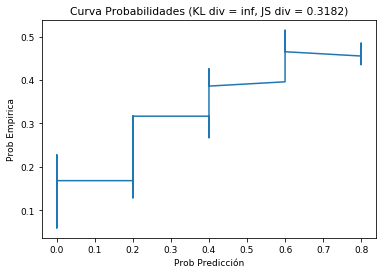

In [0]:
# Usamos KNN sin ajuste, con parametros por defecto.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_entren, y_entren)


#mostramos las medidas de calidad, incluyendo la función de costo con entrenamiento y validacion
print('\nEntrenamiento')
custom_cost(knn, X_entren, y_entren)
print('\nValidacion')
custom_cost(knn, X_val, y_val)
print()
#mostramos probabilidades
y_val_prob = knn.predict_proba(X_val)[:,1]
mostrarPQ(y_val, y_val_prob)

# Busqueda del  K Optimo en KNN

In [0]:
# Función para buscar el mejor costo.
import sys
from sklearn.neighbors import KNeighborsClassifier

def imprimirCalidad(calidad):
    print('Exactitud:    ',  calidad.accuracy)
    print('Precisión:    ', calidad.precision)
    print('Exhaustividad:', calidad.recall)
    print('AUC:          ', calidad.AUC)
    print('Costo por cliente:', calidad.cost)


def mejorKNN(X_entren, y_entren, X_val, y_val,
                 n_neighbors_list=[20], printdetail=False):
    
    _cost = sys.float_info.max
    
    for n_neighbors in n_neighbors_list:
        miKNN = KNeighborsClassifier(n_neighbors = n_neighbors)
        miKNN.fit(X_entren, y_entren)

        if printdetail:
            print('\n* Parametro *')
            print('\nn_neighbors =', n_neighbors)
            print('\nEntrenamiento')
            entren_cost = custom_cost(miKNN, X_entren, y_entren, True)
            print('\nValidacion')
            val_cost = custom_cost(miKNN, X_val, y_val, True)
        else:
            entren_cost = custom_cost(miKNN, X_entren, y_entren, False)
            val_cost = custom_cost(miKNN, X_val, y_val, False)

        if _cost > val_cost.cost:
            _cost = val_cost.cost
            _n_neighbors = n_neighbors
            _entren_cost = entren_cost
            _val_cost = val_cost
            _miKNN = miKNN

    print('\n*** Mejor Resultado ***')
    print('\nParametros:')
    print('n_neighbors =', _n_neighbors)
    print('\nEntrenamiento')
    imprimirCalidad(_entren_cost)
    print('\nValidacion')
    imprimirCalidad(_val_cost)

    print('\nProbabilidad de no pago')
    y_val_prob = _miKNN.predict_proba(X_val)[:,1] 
    mostrarPQ(y_val, y_val_prob)


*** Mejor Resultado ***

Parametros:
n_neighbors = 3

Entrenamiento
Exactitud:     0.8589583333333334
Precisión:     0.7678916827852998
Exhaustividad: 0.5219759579263712
AUC:           0.7384992233409967
Costo por cliente: 0.4494166666666667

Validacion
Exactitud:     0.7543333333333333
Precisión:     0.4321608040201005
Exhaustividad: 0.2518301610541728
AUC:           0.5771451193704182
Costo por cliente: 0.8696666666666667

Probabilidad de no pago


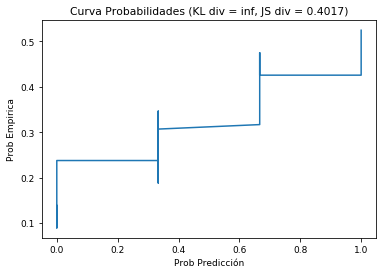

In [0]:
# buscamos el mejor parametro para el modelo KNN.
mejorKNN(X_entren, y_entren, X_val, y_val, 
             n_neighbors_list=[3,5,7,9,11,20,25,30],
             printdetail=False)


*** Mejor Resultado ***

Parametros:
n_neighbors = 3

Entrenamiento
Exactitud:     0.8589583333333334
Precisión:     0.7678916827852998
Exhaustividad: 0.5219759579263712
AUC:           0.7384992233409967
Costo por cliente: 0.4494166666666667

Validacion
Exactitud:     0.7543333333333333
Precisión:     0.4321608040201005
Exhaustividad: 0.2518301610541728
AUC:           0.5771451193704182
Costo por cliente: 0.8696666666666667

Probabilidad de no pago


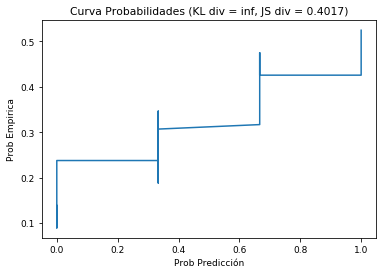

In [0]:
# buscamos el mejor parametro para el modelo KNN.
mejorKNN(X_entren, y_entren, X_val, y_val, 
             n_neighbors_list=[3,5,7,9,10,20,25,30],
             printdetail=False)

### Over Sampling


Entrenamiento
Exactitud:     0.9136592418076676
Precisión:     0.8596434058004748
Exhaustividad: 0.9887556221889056
AUC:           0.9136592418076677
Costo por cliente: -0.38554829727993145

Validacion
Exactitud:     0.67
Precisión:     0.3389296956977964
Exhaustividad: 0.47291361639824303
AUC:           0.6005051465677016
Costo por cliente: 0.7023333333333334

Probabilidad de no pago


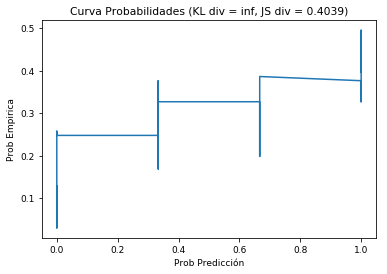

In [0]:
# probar data balanciada, con los mejores parametros encontrados en el ejercicio Sin oversampling
from sklearn.neighbors import KNeighborsClassifier

#utilizaremos X e y de entrenamiento 
knn_b = KNeighborsClassifier(n_neighbors = 3)
knn_b.fit(X_entren_os, y_entren_os)

print('\nEntrenamiento')
custom_cost(knn_b, X_entren_os, y_entren_os, True)
print('\nValidacion')
custom_cost(knn_b, X_val, y_val, True)
print('\nProbabilidad de no pago')
y_val_prob = knn_b.predict_proba(X_val)[:,1] 
mostrarPQ(y_val, y_val_prob)


## Busqueda del mejor KNN - con oversampling


*** Mejor Resultado ***

Parametros:
n_neighbors = 13

Entrenamiento
Exactitud:     0.7527307774684087
Precisión:     0.7428733148090975
Exhaustividad: 0.773024202184622
AUC:           0.7527307774684086
Costo por cliente: 0.3147087170700364

Validacion
Exactitud:     0.675
Precisión:     0.3625235404896422
Exhaustividad: 0.5636896046852123
AUC:           0.6357507151609056
Costo por cliente: 0.594

Probabilidad de no pago


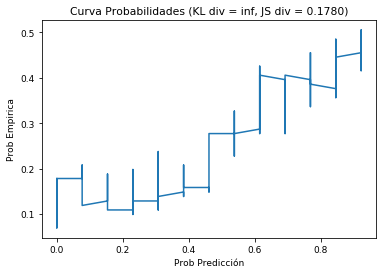

In [0]:
# encontramos el modelo con mejor parámetro 
mejorKNN(X_entren_os, y_entren_os, X_val, y_val, 
             n_neighbors_list=[3,5,6,7,8,9,11,13,15,20], 
             printdetail=False)


Entrenamiento
Exactitud:     0.7537988853427333
Precisión:     0.7423801291966154
Exhaustividad: 0.7773543562139761
AUC:           0.7537988853427332
Costo por cliente: 0.3028152241223265

Validacion
Exactitud:     0.6686666666666666
Precisión:     0.3226433430515063
Exhaustividad: 0.5278219395866455
AUC:           0.6169265750231835
Costo por cliente: 0.6166666666666667

Probabilidad de no pago


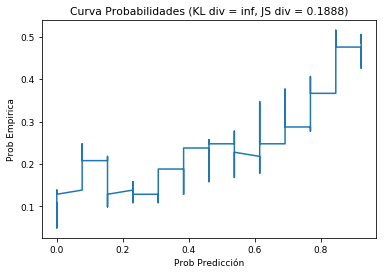

In [0]:
#utilizaremos entrenaminto + validacion para luego usar test
knn_b = KNeighborsClassifier(n_neighbors = 13)
knn_b.fit(X_entrenval_os, y_entrenval_os)

print('\nEntrenamiento')
custom_cost(knn_b, X_entrenval_os, y_entrenval_os, True)
print('\nValidacion')
custom_cost(knn_b, X_test, y_test, True)
print('\nProbabilidad de no pago')
y_test_prob = knn_b.predict_proba(X_test)[:,1] 
mostrarPQ(y_test, y_test_prob)